<a href="https://colab.research.google.com/github/fmuranda/Climate_Science./blob/main/tutorials/W1D3_RemoteSensing/student/W1D3_Tutorial7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/neuromatch/climate-course-content/blob/main/tutorials/W1D3_RemoteSensing/student/W1D3_Tutorial7.ipynb) &nbsp; <a href="https://kaggle.com/kernels/welcome?src=https://raw.githubusercontent.com/neuromatch/climate-course-content/main/tutorials/W1D3_RemoteSensing/student/W1D3_Tutorial7.ipynb" target="_parent"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open in Kaggle"/></a>


# Tutorial 7: Impact of Climate Variability - Precipitation

**Week 1, Day 3, Remote Sensing**

**Content creators:** Douglas Rao

**Content reviewers:** Katrina Dobson, Younkap Nina Duplex, Maria Gonzalez, Will Gregory, Nahid Hasan,  Paul Heubel, Sherry Mi, Beatriz Cosenza Muralles, Jenna Pearson, Agustina Pesce, Chi Zhang, Ohad Zivan

**Content editors:** Paul Heubel, Jenna Pearson, Chi Zhang, Ohad Zivan

**Production editors:** Wesley Banfield, Paul Heubel, Jenna Pearson, Konstantine Tsafatinos, Chi Zhang, Ohad Zivan

**Our 2024 Sponsors:** CMIP, NFDI4Earth


# Tutorial Objectives

*Estimated timing of tutorial:* 25 minutes

In this tutorial, the primary goal is to understand how to utilize satellite data to investigate the effects of large-scale climate variability on precipitation.

Upon the completion of this tutorial, you will be able to:

- Comprehend the influence of the El Niño-Southern Oscillation (ENSO) on precipitation and its geographical distribution.
- Compute Pearson's correlation coefficient, a statistical measure used to determine the relationship between two time series.


# Setup


In [3]:
# installations ( uncomment and run this cell ONLY when using google colab or kaggle )

# # properly install cartopy in colab to avoid session crash
!apt-get install libproj-dev proj-data proj-bin --quiet
!apt-get install libgeos-dev --quiet
!pip install cython --quiet
!pip install cartopy --quiet

!apt-get -qq install python-cartopy python3-cartopy  --quiet
!pip uninstall -y shapely  --quiet
!pip install shapely --no-binary shapely  --quiet

!pip install boto3 --quiet

# you may need to restart the runtime after running this cell and that is ok

Reading package lists...
Building dependency tree...
Reading state information...
libproj-dev is already the newest version (9.3.1-1~jammy0).
libproj-dev set to manually installed.
proj-data is already the newest version (9.3.1-1~jammy0).
proj-data set to manually installed.
The following NEW packages will be installed:
  proj-bin
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 205 kB of archives.
After this operation, 521 kB of additional disk space will be used.
Get:1 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy/main amd64 proj-bin amd64 9.3.1-1~jammy0 [205 kB]
Fetched 205 kB in 1s (150 kB/s)
Selecting previously unselected package proj-bin.
(Reading database ... 126281 files and directories currently installed.)
Preparing to unpack .../proj-bin_9.3.1-1~jammy0_amd64.deb ...
Unpacking proj-bin (9.3.1-1~jammy0) ...
Setting up proj-bin (9.3.1-1~jammy0) ...
Processing triggers for man-db (2.10.2-1) ...
Reading package lists...
Building dependenc

In [4]:
# imports
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import os
import pooch
import tempfile
from scipy import stats

In [5]:
# @title Install and import feedback gadget

!pip3 install vibecheck datatops --quiet

from vibecheck import DatatopsContentReviewContainer
def content_review(notebook_section: str):
    return DatatopsContentReviewContainer(
        "",  # No text prompt
        notebook_section,
        {
            "url": "https://pmyvdlilci.execute-api.us-east-1.amazonaws.com/klab",
            "name": "comptools_4clim",
            "user_key": "l5jpxuee",
        },
    ).render()


feedback_prefix = "W1D3_T7"

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 26.2 MB/s eta 0:00:00


In [6]:
# @title Figure settings
import ipywidgets as widgets  # interactive display

%config InlineBackend.figure_format = 'retina'
plt.style.use(
    "https://raw.githubusercontent.com/neuromatch/climate-course-content/main/cma.mplstyle"
)

In [7]:
# @title Helper functions


def pooch_load(filelocation=None, filename=None, processor=None):
    # this is different for each day
    shared_location = "/home/jovyan/shared/data/tutorials/W1D3_RemoteSensing"
    user_temp_cache = tempfile.gettempdir()

    if os.path.exists(os.path.join(shared_location, filename)):
        file = os.path.join(shared_location, filename)
    else:
        file = pooch.retrieve(
            filelocation,
            known_hash=None,
            fname=os.path.join(user_temp_cache, filename),
            processor=processor,
        )

    return file

In [8]:
# @title Video 1: Impact of Climate Variability

from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display


class PlayVideo(IFrame):
    def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
        self.id = id
        if source == "Bilibili":
            src = f"https://player.bilibili.com/player.html?bvid={id}&page={page}"
        elif source == "Osf":
            src = f"https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render"
        super(PlayVideo, self).__init__(src, width, height, **kwargs)


def display_videos(video_ids, W=400, H=300, fs=1):
    tab_contents = []
    for i, video_id in enumerate(video_ids):
        out = widgets.Output()
        with out:
            if video_ids[i][0] == "Youtube":
                video = YouTubeVideo(
                    id=video_ids[i][1], width=W, height=H, fs=fs, rel=0
                )
                print(
                    f"Video available at https://youtube.com/watch?v={video.id}")
            else:
                video = PlayVideo(
                    id=video_ids[i][1],
                    source=video_ids[i][0],
                    width=W,
                    height=H,
                    fs=fs,
                    autoplay=False,
                )
                if video_ids[i][0] == "Bilibili":
                    print(
                        f"Video available at https://www.bilibili.com/video/{video.id}"
                    )
                elif video_ids[i][0] == "Osf":
                    print(f"Video available at https://osf.io/{video.id}")
            display(video)
        tab_contents.append(out)
    return tab_contents


video_ids = [("Youtube", "TJr_nNP87Rg"), ("Bilibili", "BV1Th4y1j7sY")]
tab_contents = display_videos(video_ids, W=730, H=410)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
    tabs.set_title(i, video_ids[i][0])
display(tabs)

In [9]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Impact_of_Climate_Variability_Video")

In [10]:
# @markdown
from ipywidgets import widgets
from IPython.display import IFrame

link_id = "tyjwu"

print(f"If you want to download the slides: https://osf.io/download/{link_id}/")
IFrame(src=f"https://mfr.ca-1.osf.io/render?url=https://osf.io/{link_id}/?direct%26mode=render%26action=download%26mode=render", width=854, height=480)

If you want to download the slides: https://osf.io/download/tyjwu/


In [11]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Impact_of_Climate_Variability_Slides")

# Section 1: ENSO and Precipitation


As discussed in previous tutorials, ENSO oscillates irregularly between El Niño and La Niña phases every two to seven years. These shifts often prompt predictable changes in ocean surface temperature and disrupt wind and rainfall patterns across the tropics, leading to a cascade of global side effects.

In this context, we will be utilizing satellite data to scrutinize the influence of ENSO on precipitation patterns.


## Section 1.1: Get ENSO Index Oceanic Niño Index (ONI)

In Tutorial 6, we calculated the Oceanic Niño Index (ONI) using the OISST Climate Data Records that contain interpolated sea surface temperature (SST) data. Now we just read the ONI values using the climatology of 1982-2011.


In [12]:
# download't6_oceanic-nino-index.nc'

url_nino = "https://osf.io/8rwxb/download/"
filename_nino = "t6_oceanic-nino-index"
oni = xr.open_dataset(pooch_load(filelocation=url_nino, filename=filename_nino))
oni

SHA256 hash of downloaded file: 583ae1ce6f9a990d2535f5c7ef816edd3252990208438c2d84a88025b7a21419
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


<xarray.Dataset> Size: 8kB
Dimensions:  (time: 499)
Coordinates:
  * time     (time) datetime64[ns] 4kB 1981-09-01 1981-10-01 ... 2023-03-01
    month    (time) int32 2kB ...
Data variables:
    sst      (time) float32 2kB ...

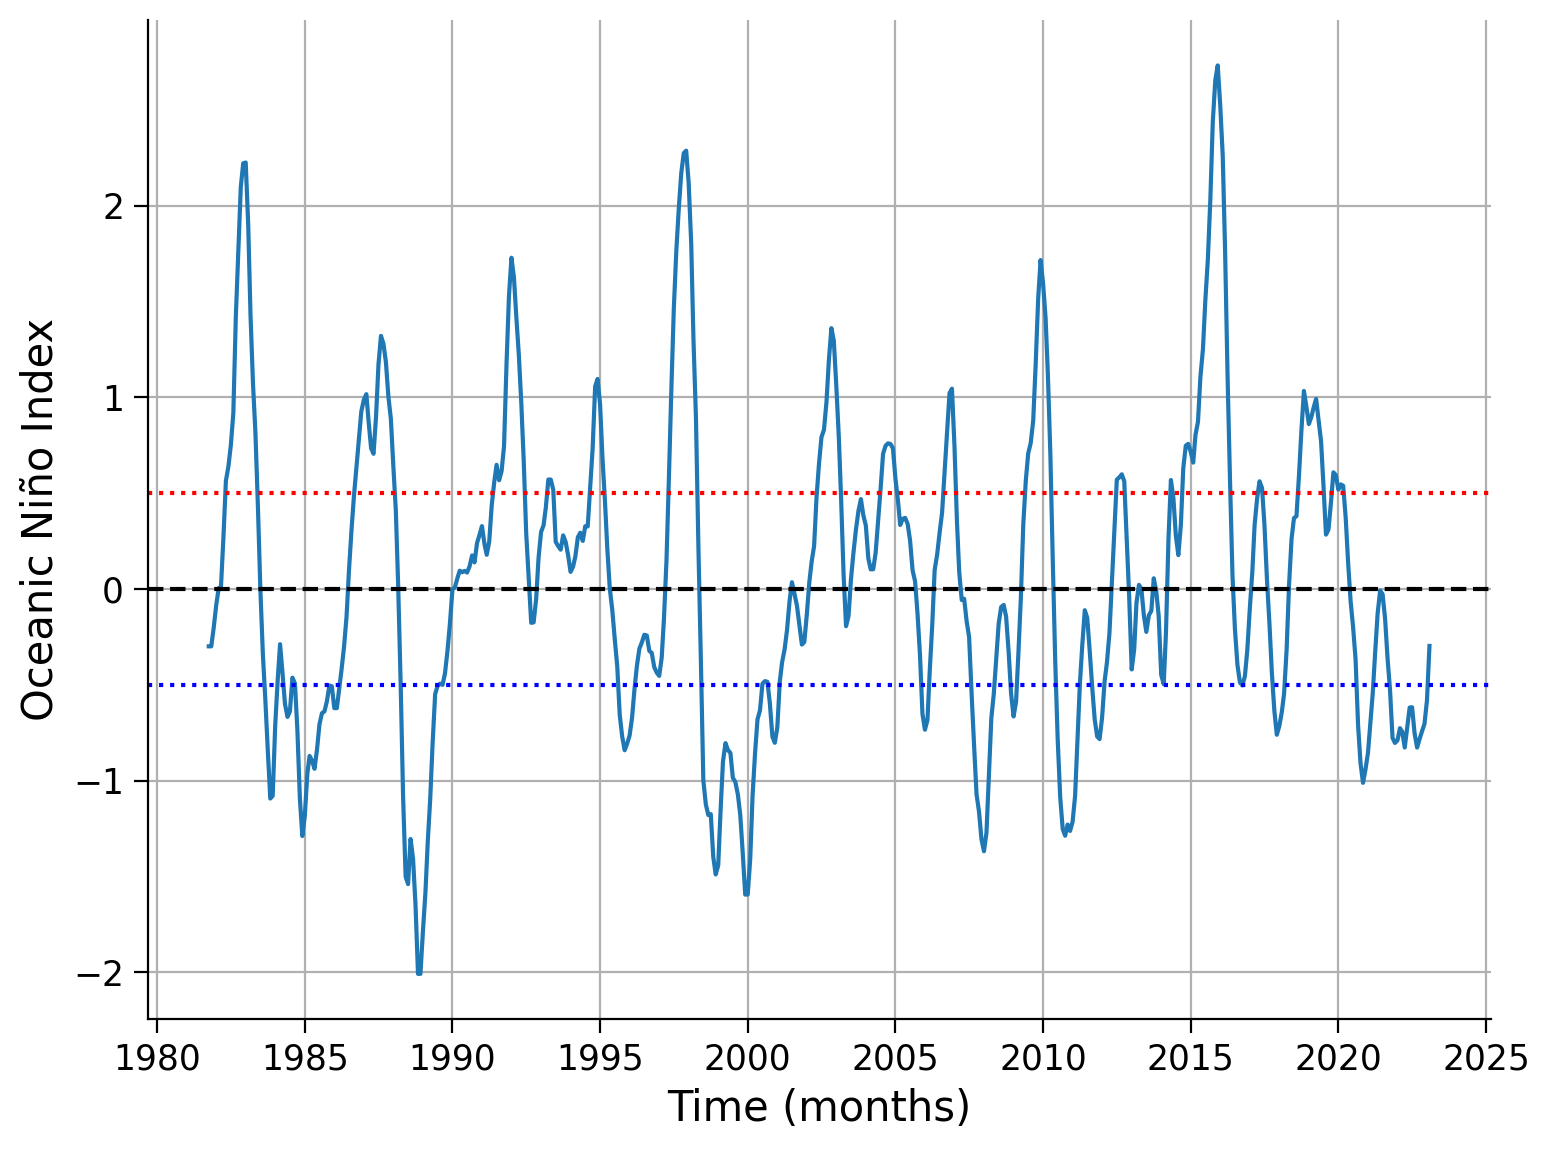

In [13]:
# plot the ONI timeseries we just downloaded
fig, ax = plt.subplots()
oni.sst.plot(ax=ax)

# aesthetics
ax.set_xlabel("Time (months)")
ax.set_ylabel("Oceanic Niño Index")
ax.axhline(y=0, linestyle="dashed", color="k")
ax.axhline(y=0.5, linestyle="dotted", color="r")
ax.axhline(y=-0.5, linestyle="dotted", color="b")
ax.grid(True)

## Section 1.2: Get Precipitation Anomaly Data

In Tutorial 5, we created the monthly anomaly data of precipitation globally using the GPCP Monthly Precipitation Climate Data Records. Here, we read in the anomaly data and look at one specific month (e.g., 1998-01-01).


In [14]:
# download file 't5_gpcp-monthly-anomaly_1981-2010.nc'
url_precip = "https://osf.io/vhdcg/download/"
filename_precip = "t5_gpcp-monthly-anomaly_1981-2010.nc"
precip = xr.open_dataset(pooch_load(filelocation=url_precip, filename=filename_precip))
precip

SHA256 hash of downloaded file: 0d4816ee542ecfed508981a5f5bfefceac3da82bc10b3b739fdf11a85574bc9b
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


<xarray.Dataset> Size: 22MB
Dimensions:    (time: 528, latitude: 72, longitude: 144)
Coordinates:
  * time       (time) datetime64[ns] 4kB 1979-01-01 1979-02-01 ... 2022-12-01
    month      (time) int32 2kB ...
  * longitude  (longitude) float32 576B 1.25 3.75 6.25 ... 353.8 356.2 358.8
  * latitude   (latitude) float32 288B -88.75 -86.25 -83.75 ... 86.25 88.75
Data variables:
    precip     (time, latitude, longitude) float32 22MB ...

/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


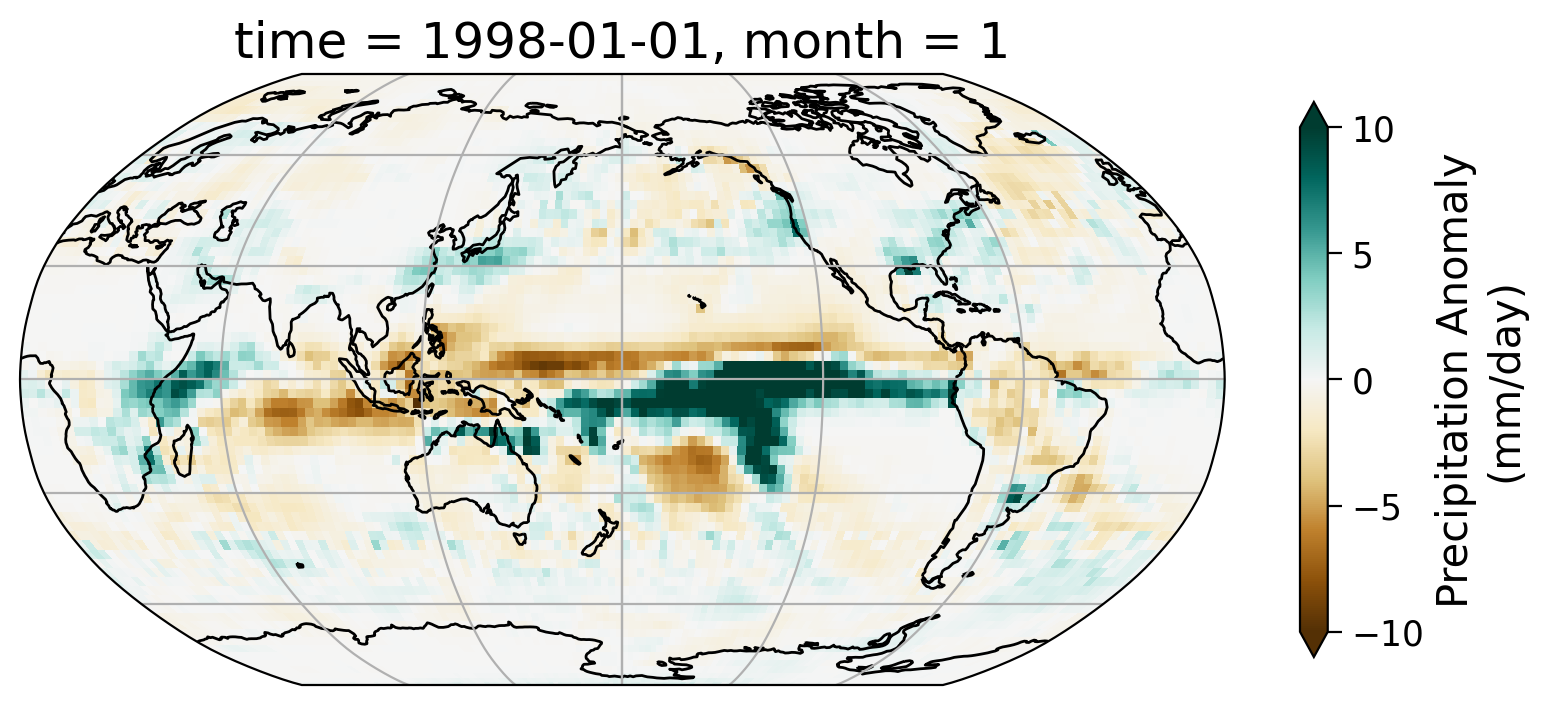

In [15]:
# select just data from 1998
data = precip.sel(time="1998-01-01")

# initiate plot
fig = plt.figure()
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))
# add coast- and gridlines
ax.coastlines()
ax.gridlines()
# draw precipitation data
data.precip.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    vmin=-10,
    vmax=10,
    #robust=True,
    cmap="BrBG",
    cbar_kwargs=dict(shrink=0.5, label="Precipitation Anomaly\n(mm/day)"),
)

## Section 1.3: Spatial Pattern

Let's look at one specific ENSO event - the **1997/1998 El Niño** and see how the spatial pattern of the precipitation evolves. The 1997/1998 El Niño is one of the most significant ENSO events that started in May of 1997 and ended April of 1998.

Let's examine the seasonal precipitation anomaly pattern during this time period.


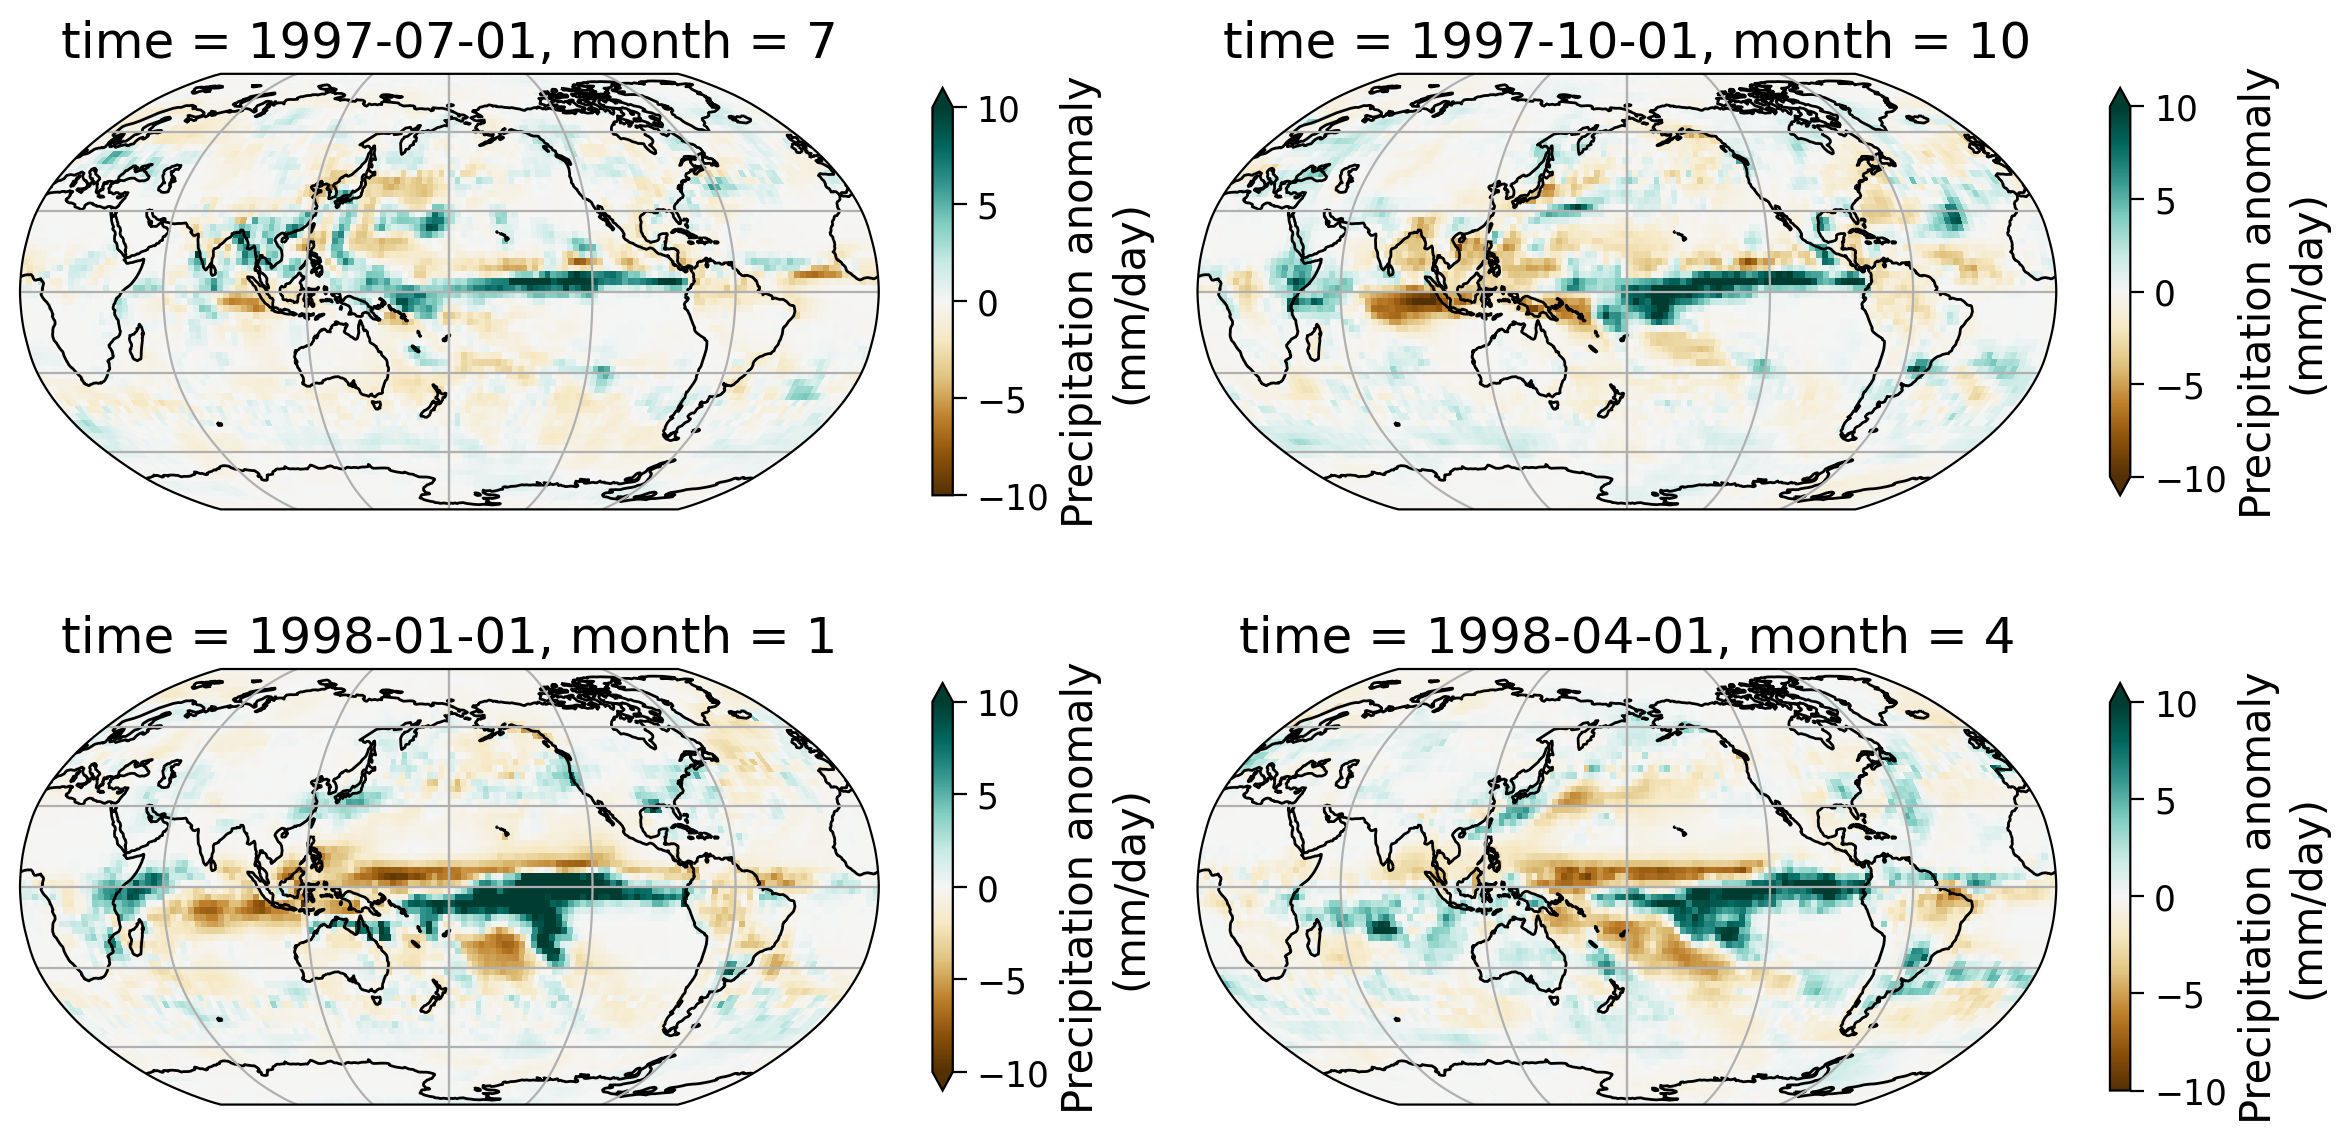

In [16]:
# define the figure and each axis for the 2 rows and 2 columns
fig, axs = plt.subplots(
    nrows=2,
    ncols=2,
    subplot_kw={"projection": ccrs.Robinson(central_longitude=180)},
    figsize=(12, 7.5),
    sharex=True,
    sharey=True,
)

# axs is a 2-dimensional array of `GeoAxes`.  We will flatten it into a 1-D array to loop over it
axs = axs.flatten()

# loop over selected months (Jan, Apr, Jul, Oct)
for i, month in enumerate(["1997-07-01", "1997-10-01", "1998-01-01", "1998-04-01"]):
    # draw the coastines and major gridline for each subplot
    axs[i].coastlines()
    axs[i].gridlines()

    # draw the precipitation anomaly data
    precip.precip.sel(time=month).plot(
        ax=axs[i],
        transform=ccrs.PlateCarree(),
        vmin=-10,
        vmax=10,  # use the same range of max and min value
        cmap="BrBG",
        cbar_kwargs=dict(shrink=0.5, label="Precipitation anomaly\n(mm/day)"),
    )

In this series of four monthly maps, notice the shifts in precipitation patterns across the tropics and various land regions.

In particular, there are large increases and decreases in precipitation over the tropical ocean, where ENSO is actively monitored. In the Niño3.4 region, the intensification of the El Niño phase (which is characterized by warmer SSTs over the central and eastern Pacific) occurs alongside an increase in rainfall shown here (more blue areas near the equator).

In addition to these changes, there are also rainfall patterns in regions such as North and South America, with the Amazon as a notable example.


# Section 2: Correlation Analysis

Beyond visual inspection, we can also quantify the correlation between the ENSO (ONI) and the precipitation anomaly for a region of our interest.

Let's use the Niño3.4 region as an example to calculate the correlation berween precipitation and ONI.


In [17]:
# extract precipitation data for the Niño 3.4 region & the same time period with ONI data
precip_nino34 = precip.sel(
    latitude=slice(-5, 5),
    longitude=slice(190, 240),
    time=slice("1981-09-01", "2022-12-01"),
)
precip_nino34

<xarray.Dataset> Size: 165kB
Dimensions:    (time: 496, latitude: 4, longitude: 20)
Coordinates:
  * time       (time) datetime64[ns] 4kB 1981-09-01 1981-10-01 ... 2022-12-01
    month      (time) int32 2kB ...
  * longitude  (longitude) float32 80B 191.2 193.8 196.2 ... 233.8 236.2 238.8
  * latitude   (latitude) float32 16B -3.75 -1.25 1.25 3.75
Data variables:
    precip     (time, latitude, longitude) float32 159kB ...

In [18]:
# calculate regional mean of the precipitation anomaly
precip_nino34_mean = precip_nino34.mean(("latitude", "longitude"))

# extract ONI values for the common period (ending at 2022-12-01)
nino34 = oni.sel(time=slice("1981-09-01", "2022-12-01"))

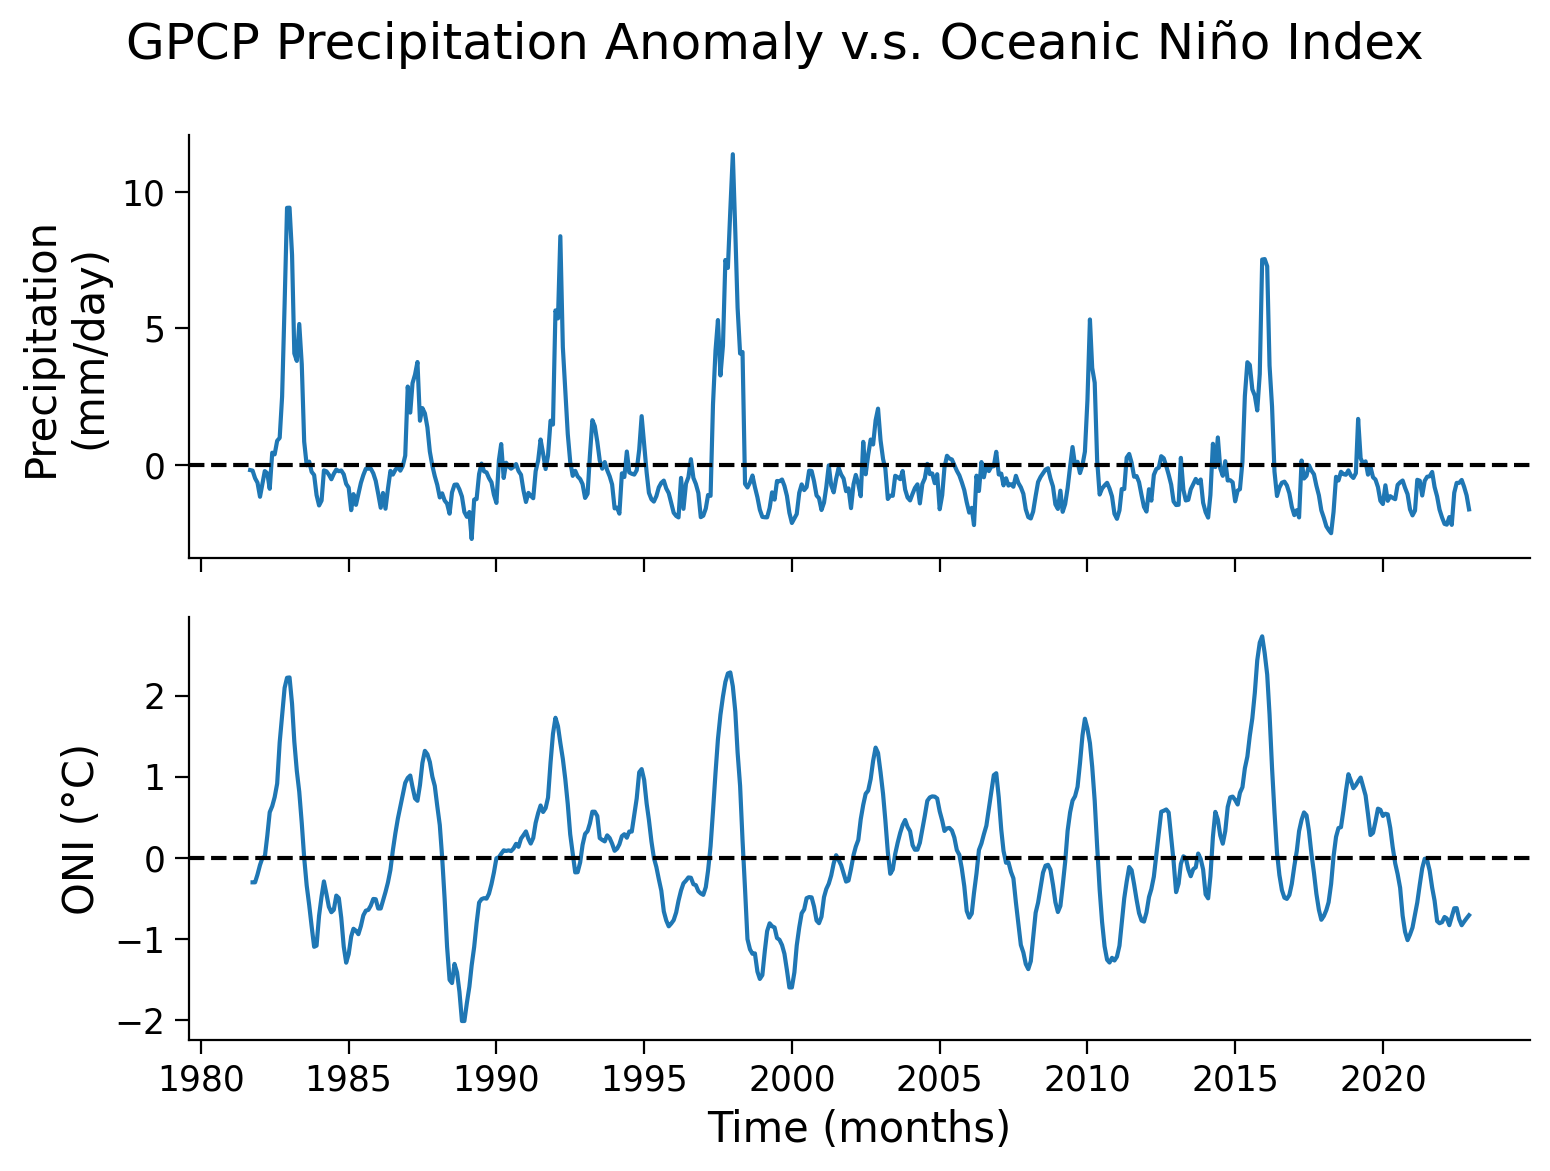

In [19]:
# set up two subplots that share the x-axis to compare precipitation anomaly and ONI index
fig, axs = plt.subplots(2, sharex=True)

# aesthetics upper plot
fig.suptitle("GPCP Precipitation Anomaly v.s. Oceanic Niño Index")
axs[0].plot(precip_nino34_mean.time, precip_nino34_mean.precip)
axs[0].set_ylabel("Precipitation\n(mm/day)")
axs[0].axhline(y=0, color="k", linestyle="dashed")

# draw ONI in lower plot
axs[1].plot(nino34.time, nino34.sst)
# aesthetics lower plot
axs[1].set_ylabel("ONI (°C)")
axs[1].set_xlabel("Time (months)")
axs[1].axhline(y=0, color="k", linestyle="dashed")

From theses two time series, a pattern exists of a synchronized change in the precipitation anomaly and ONI. Now, we can generate a scatter plot to further examine this relationship.


Text(0.1, 0.75, 'La Niña')

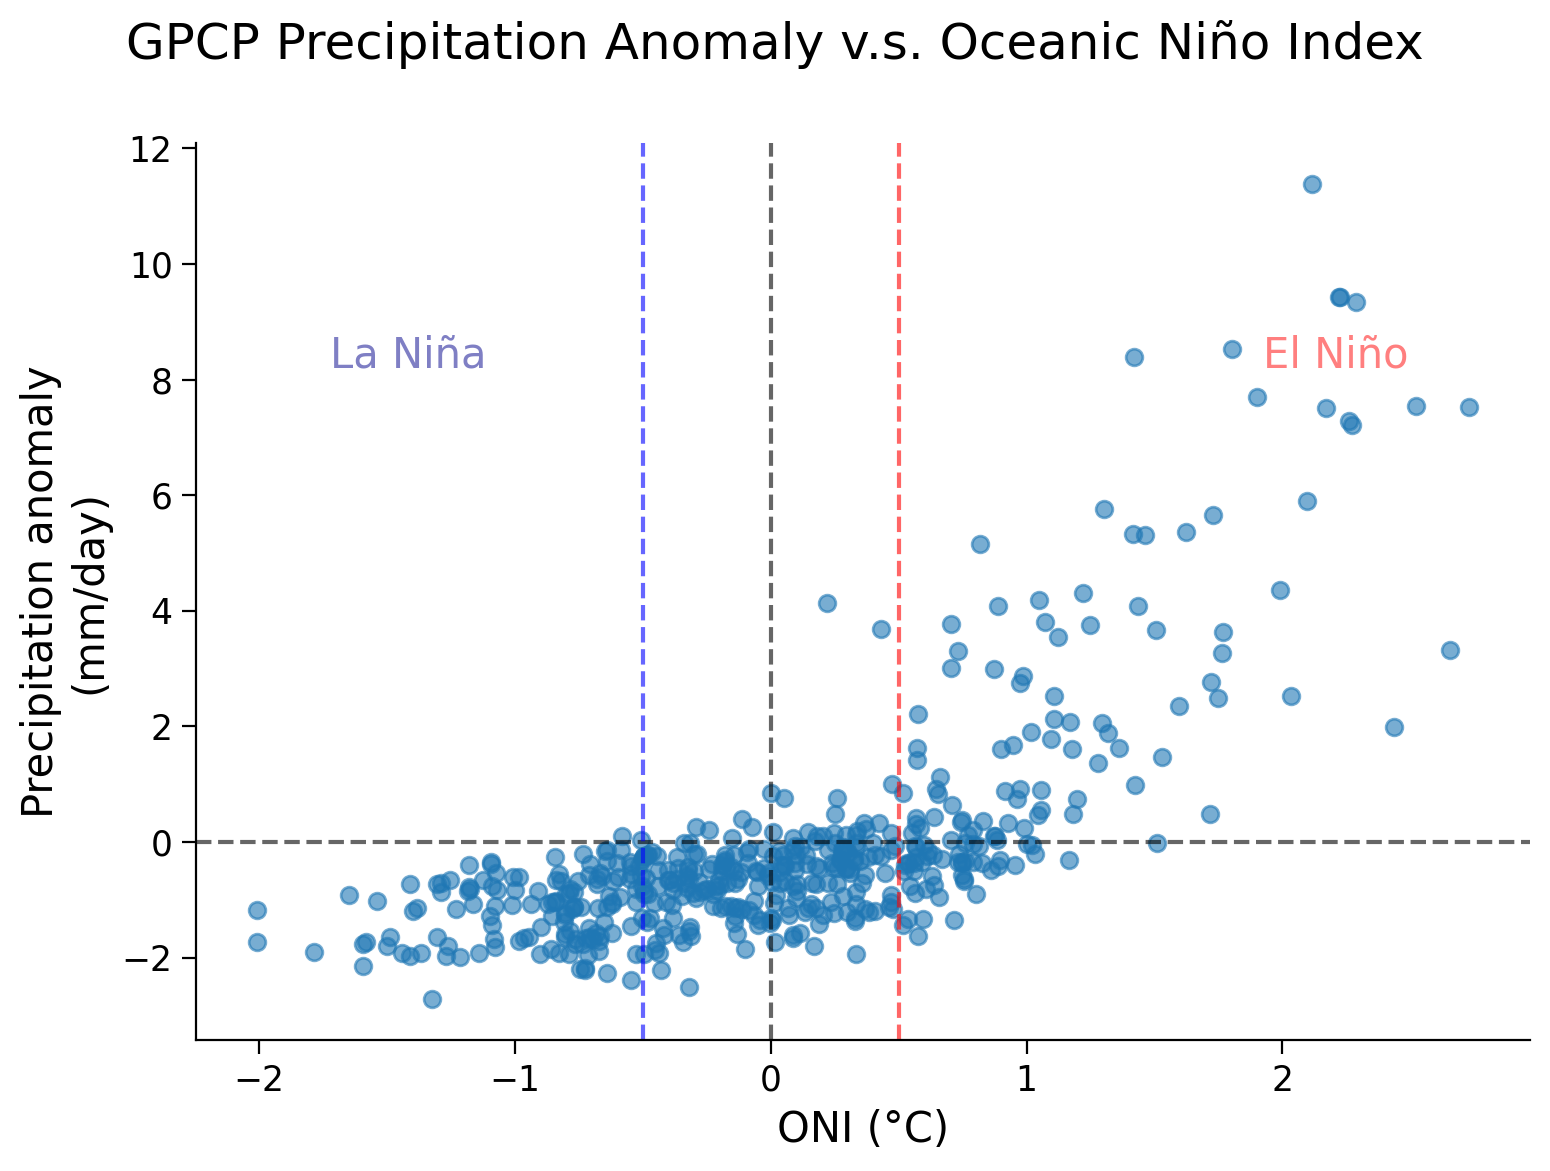

In [20]:
# set up a scatter plot
fig, ax = plt.subplots()

# scatter ONI index vs. precipitation
ax.scatter(nino34.sst, precip_nino34_mean.precip, alpha=0.6)

# add horizontal and vertical lines of 0 values
ax.axhline(y=0, linestyle="dashed", color="k", alpha=0.6)
ax.axvline(x=0, linestyle="dashed", color="k", alpha=0.6)
ax.axvline(x=0.5, linestyle="dashed", color="r", alpha=0.6)  # El Nino threshold
ax.axvline(x=-0.5, linestyle="dashed", color="b", alpha=0.6)  # La Nina threshold

# aesthetics
fig.suptitle("GPCP Precipitation Anomaly v.s. Oceanic Niño Index")
ax.set_xlabel("ONI (°C)")
ax.set_ylabel("Precipitation anomaly\n(mm/day)")

# add La Niña and El Niño annotations for more accessibility
ax.annotate('El Niño',
            xy = (1, 1),
            xycoords = 'axes fraction',
            xytext = (0.8, 0.75),
            textcoords = 'axes fraction',
            alpha = 0.5, color = 'r')
ax.annotate('La Niña',
            xy=(1, 1),
            xycoords='axes fraction',
            xytext=(0.1, 0.75),
            textcoords='axes fraction',
            alpha = 0.5, color = 'darkblue')

The scatter plot unveils a nonlinear relationship between precipitation anomalies and the ONI across different ENSO phases:

- During the La Niña phase (i.e., when ONI values fall below -0.5/ the blue line), the Niño 3.4 region typically experiences below-average precipitation.
- In contrast, during the El Niño phase (i.e., when ONI values rise above 0.5/ the red line), the Nino 3.4 region is inclined towards above-average precipitation.

Although the overall relationship is nonlinear, we are only interested in the data during different ENSO phases (ONI above and below 0.5). Looking at this data separately, visually a linear fit seems appropriate. For your projects, you should check this is so by looking at the distribution of the **residuals of the linear fit**. The residuals are the difference between a dataset predicted by the linear model you will find during the regression process and the true data. If the fit is good, there should be no relationship between these two (i.e. the distribution of residuals should have little to no correlation with your data. For simplicity, we skip this step here.

After you separate the data, you can have a look at the correlation coefficient and the associated p-value. This tells us how strongly related changes in the ONI are related to changes in precipitation anomalies. It is a value between -1 and 1, where the sign indicates whether the relationship is positive or negative, and the absolute value quantifies the correlation strength. An absolute value of the correlation coefficient closer to 1 indicates a stronger correlation. A low p-value will then assure us that the likelihood of the correlation we find being purely due to chance is very low.

First, let us separate our data into El Niño and La Niña phases by using the ONI as a threshold.


In [21]:
# El Nino Data, logically index to keep ONI values above 0.5
el_nino_sst = nino34.sst[nino34.sst > 0.5]
el_nino_precip = precip_nino34_mean.precip[nino34.sst > 0.5]

# La Nina Data, logically index to keep ONI values below -0.5
la_nina_sst = nino34.sst[nino34.sst < -0.5]
la_nina_precip = precip_nino34_mean.precip[nino34.sst < -0.5]

Text(0.1, 0.75, 'La Niña')

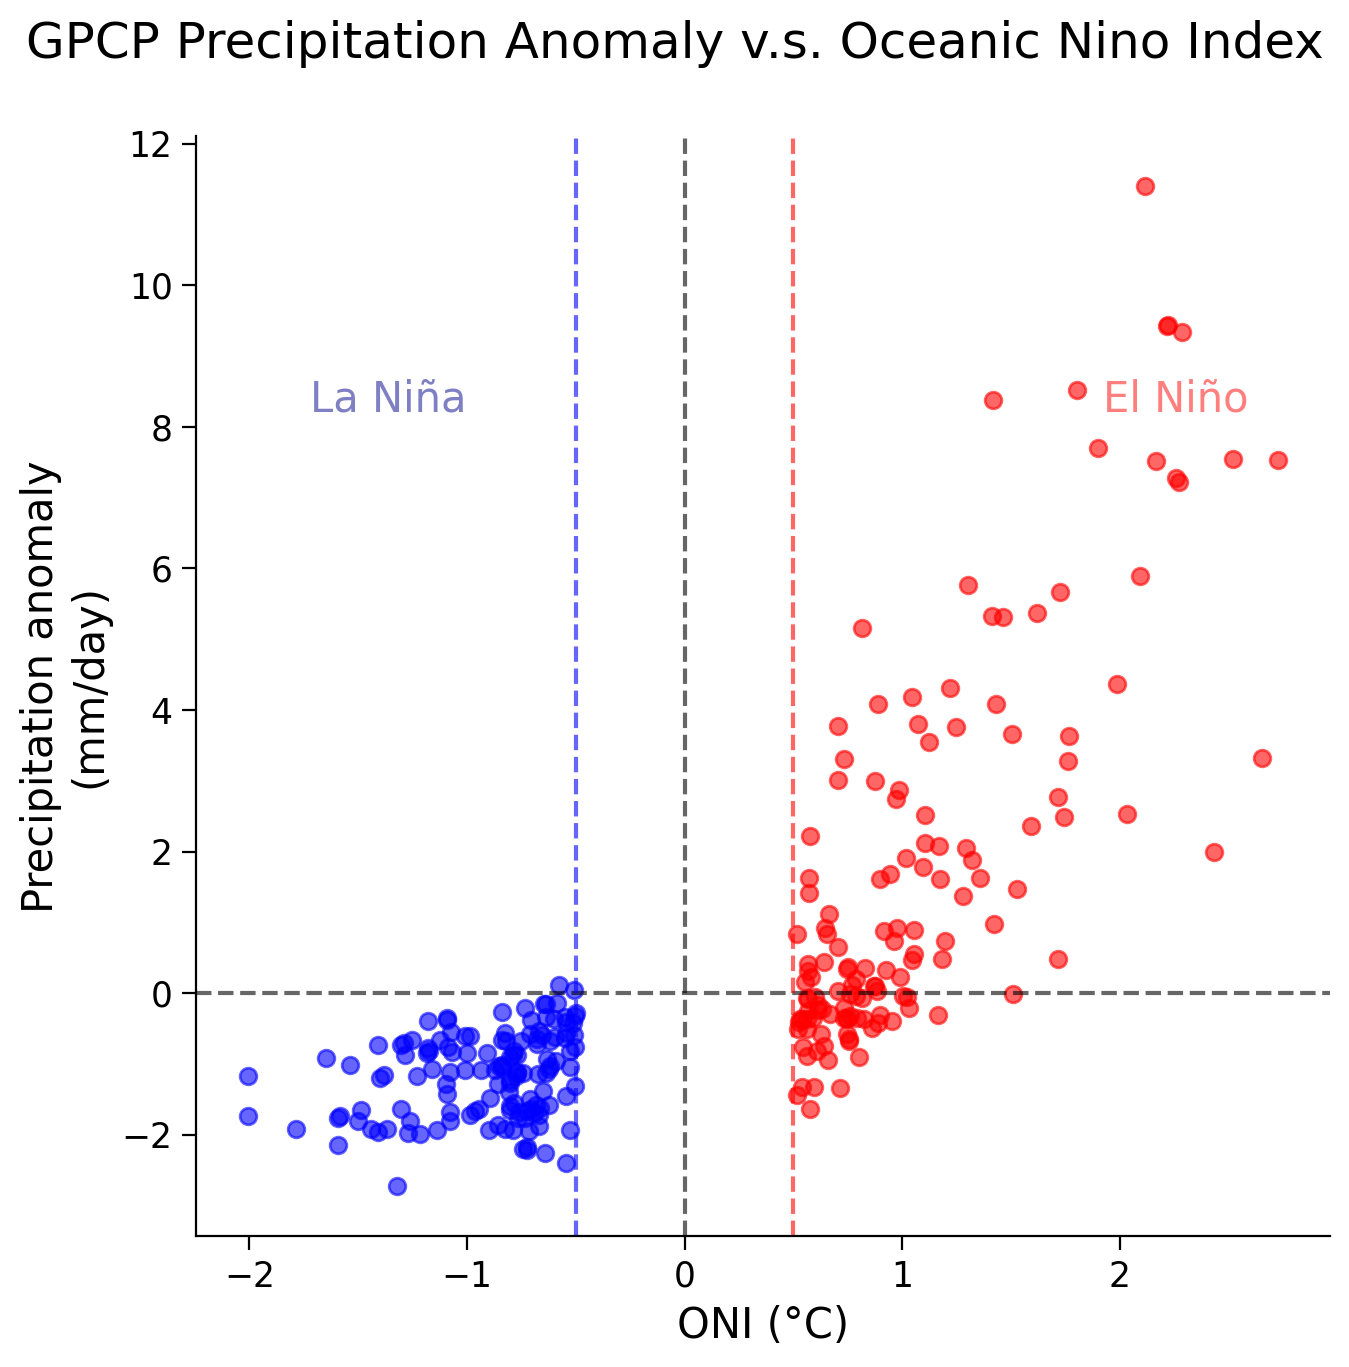

In [22]:
# set up scatter plot for just El Nino and La Nina phases
fig, ax = plt.subplots(figsize=(7, 7))

ax.scatter(el_nino_sst, el_nino_precip, c="r", alpha=0.6)
ax.scatter(la_nina_sst, la_nina_precip, c="b", alpha=0.6)

# add horizontal and vertical lines of 0 values
ax.axhline(y=0, linestyle="dashed", color="k", alpha=0.6)
ax.axvline(x=0, linestyle="dashed", color="k", alpha=0.6)
ax.axvline(x=0.5, linestyle="dashed", color="r", alpha=0.6)  # El Nino threshold
ax.axvline(x=-0.5, linestyle="dashed", color="b", alpha=0.6)  # La Nina threshold
# aesthetics
fig.suptitle("GPCP Precipitation Anomaly v.s. Oceanic Nino Index")
ax.set_xlabel("ONI (°C)")
ax.set_ylabel("Precipitation anomaly\n(mm/day)")

# add La Niña and El Niño annotations for more accessibility
ax.annotate('El Niño',
            xy = (1, 1),
            xycoords = 'axes fraction',
            xytext = (0.8, 0.75),
            textcoords = 'axes fraction',
            alpha = 0.5, color = 'r')
ax.annotate('La Niña',
            xy=(1, 1),
            xycoords='axes fraction',
            xytext=(0.1, 0.75),
            textcoords='axes fraction',
            alpha = 0.5, color = 'darkblue')

Now find the linear correlation coefficient by applying [`pearsonr()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html) from the [SciPy stats package](https://docs.scipy.org/doc/scipy/tutorial/stats.html).


In [23]:
# correlation coeff for El Nino data
el_nino_r, el_nino_p = stats.pearsonr(el_nino_sst, el_nino_precip)

print("El Niño - Corr Coef: " + str(el_nino_r) + ", p-val: " + str(el_nino_p))

# correlation coeff for La Nina data
la_nina_r, la_nina_p = stats.pearsonr(la_nina_sst, la_nina_precip)

print("La Niña - Corr Coef: " + str(la_nina_r) + ", p-val: " + str(la_nina_p))

El Niño - Corr Coef: 0.776181, p-val: 5.0174393418909005e-29
La Niña - Corr Coef: 0.27791932, p-val: 0.0010531203981979655


## Questions 2: Climate Connection

1. Note that the correlation during La Niña phases is low with a higher p-value (less significant) than the correlation coefficient during El Niño phases. Explain what this means.
2. Do the differences in correlation coefficients between phases line up with the time series above? Explain why.


[*Click for solution*](https://github.com/neuromatch/climate-course-content/tree/main/tutorials/W1D3_RemoteSensing/solutions/W1D3_Tutorial7_Solution_0feb6e7c.py)



In [24]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Questions_2")

## Coding Exercises 2

1. Choose a region of your interest to examine the relationship between ENSO (using ONI data) and precipitation anomaly globally. It will be interesting to see if the figures you make line up with your expectations from the maps we have made in the beginning of the tutorial. Will they be more or less correlated that the Niño 3.4 region? In the example code we will use Italy, but you can change this to be whatever region you are interested in.


El Niño - Corr Coef: Ellipsis, p-val: Ellipsis
La Niña - Corr Coef: Ellipsis, p-val: Ellipsis


Text(0, 0.5, 'Precipitation Anomaly\n(mm/day)')

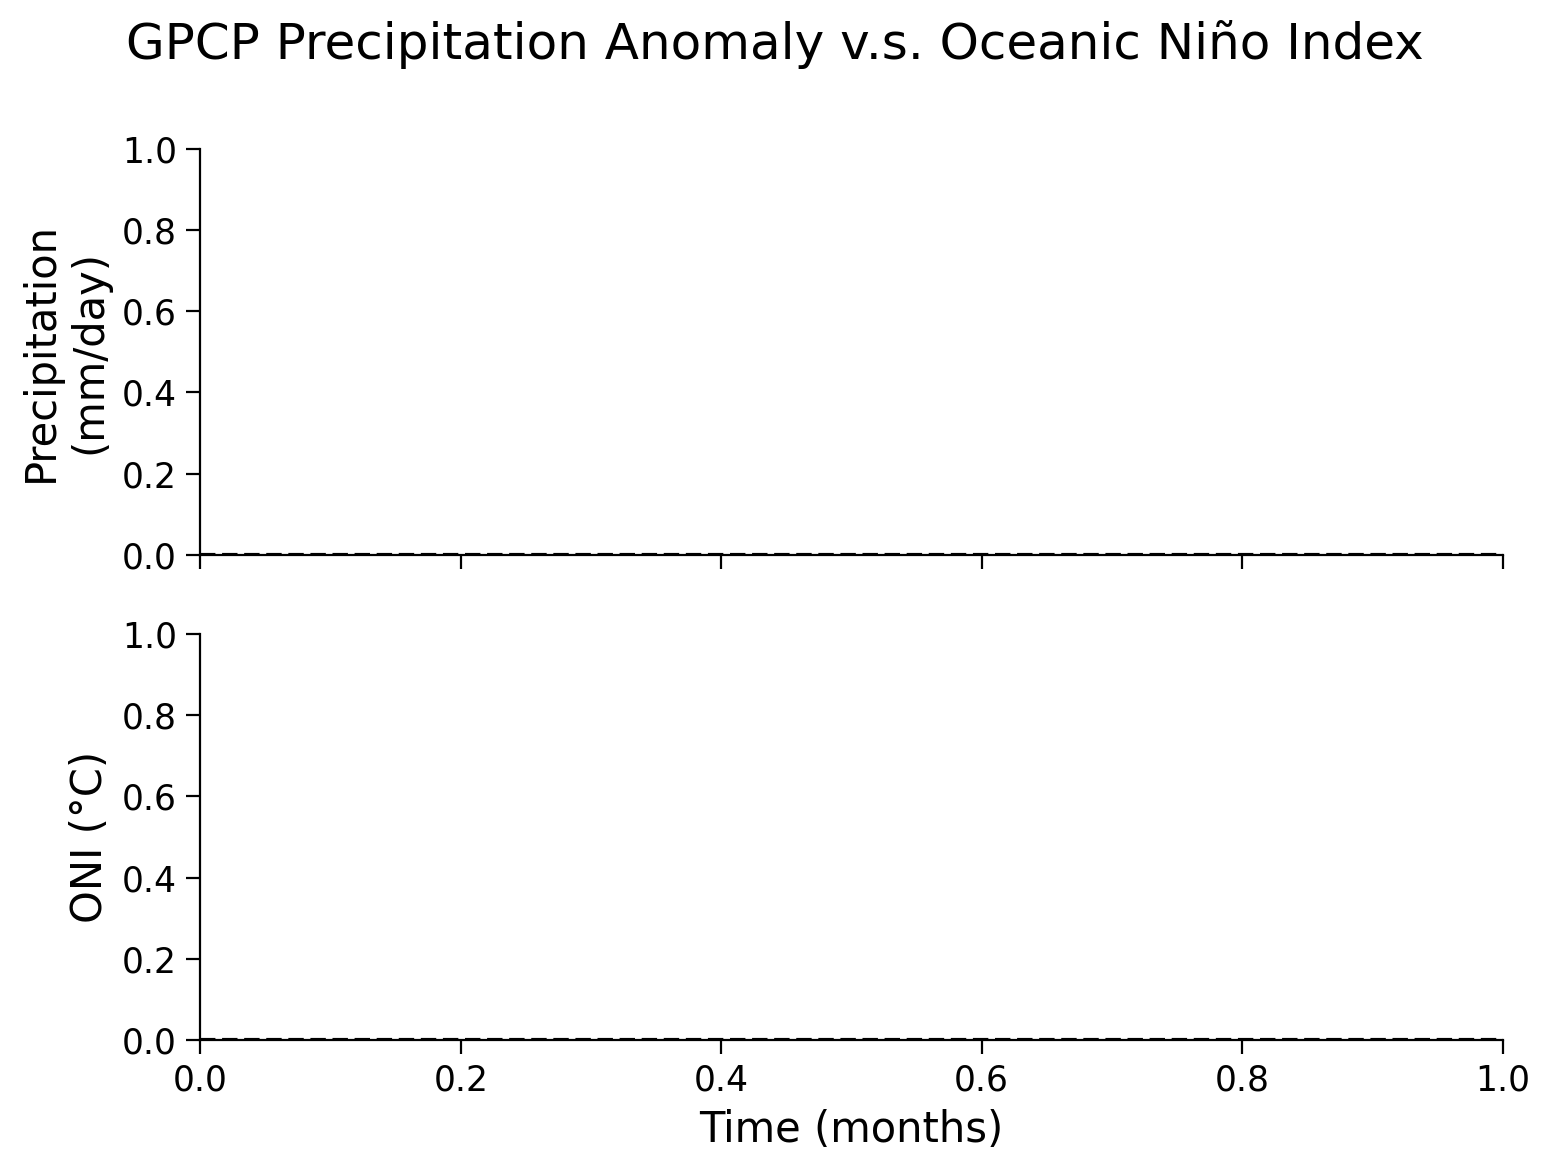

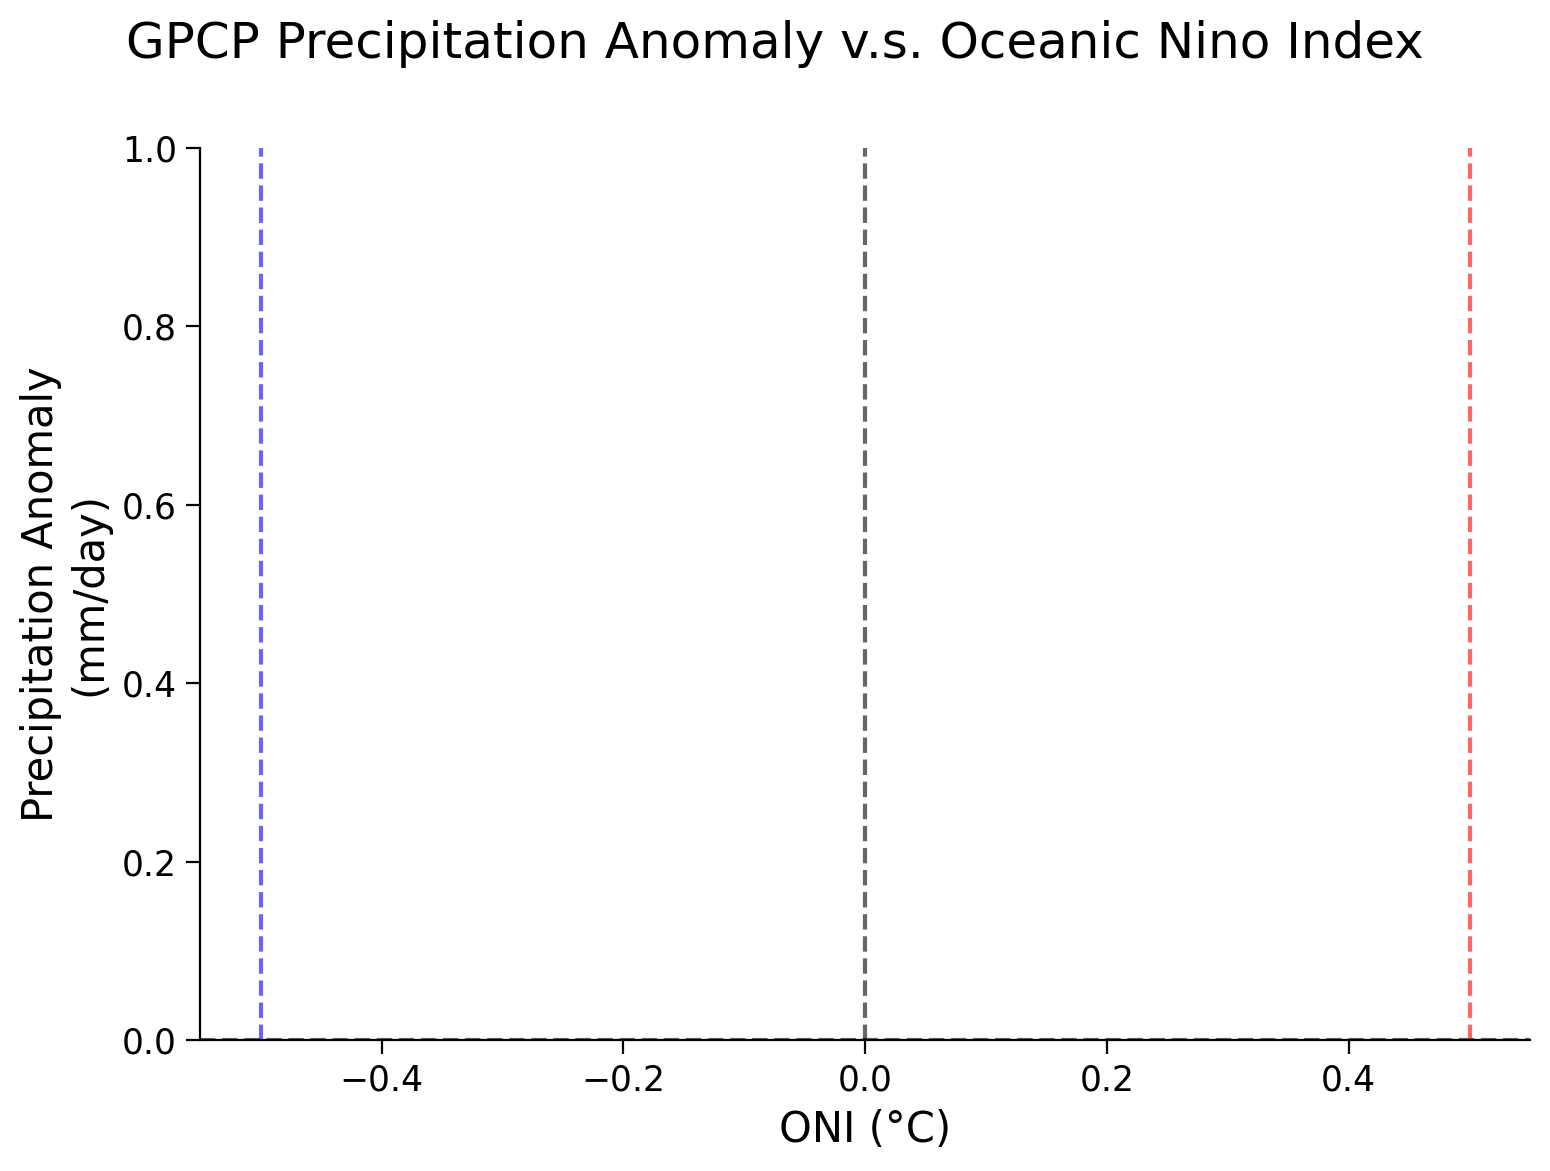

In [25]:
# define region of interest for the precipitation anomaly
italy_lon = [...,...]
italy_lat = [...,...]

# calculate regional mean time series
precip_nino34_italy = ...

# plot the time series of precipitation anomaly and ONI for the same time period on different subplots
fig, axs = plt.subplots(2, sharex=True)
# set title
fig.suptitle("GPCP Precipitation Anomaly v.s. Oceanic Niño Index")

# draw precipitation data
_ = ...
# upper plot aesthetics
axs[0].set_ylabel("Precipitation\n(mm/day)")
axs[0].axhline(y=0, color="k", linestyle="dashed")

# draw ONI data
_ = ...
# lower plot aesthetics
axs[1].set_ylabel("ONI (°C)")
axs[1].set_xlabel("Time (months)")
axs[1].axhline(y=0, color="k", linestyle="dashed")

# El Nino Data, select ONI values above 0.5 via boolean indexing
# (https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#boolean-indexing)
italy_el_nino_sst = ...
italy_el_nino_precip = ...
# La Nina Data, select ONI values below 0.5 via boolean indexing
italy_la_nina_sst = ...
italy_la_nina_precip = ...

# correlation for El Nino data
italy_el_nino_r = ...
italy_el_nino_p = ...
print("El Niño - Corr Coef: " + str(italy_el_nino_r) + ", p-val: " + str(italy_el_nino_p))

# correlation for La Nina data
italy_la_nina_r = ...
italy_la_nina_p = ...
print("La Niña - Corr Coef: " + str(italy_la_nina_r) + ", p-val: " + str(italy_la_nina_p))

# scatter plot: precipitation vs. ONI
fig, ax = plt.subplots()
fig.suptitle("GPCP Precipitation Anomaly v.s. Oceanic Nino Index")
_ = ...
_ = ...

# add horizontal and vertical lines of 0 values
ax.axhline(y=0, linestyle="dashed", color="k", alpha=0.6)
ax.axvline(x=0, linestyle="dashed", color="k", alpha=0.6)
ax.axvline(x=0.5, linestyle="dashed", color="r", alpha=0.6)  # El Nino threshold
ax.axvline(x=-0.5, linestyle="dashed", color="b", alpha=0.6)  # La Nina threshold
# labels
ax.set_xlabel("ONI (°C)")
ax.set_ylabel("Precipitation Anomaly\n(mm/day)")

[*Click for solution*](https://github.com/neuromatch/climate-course-content/tree/main/tutorials/W1D3_RemoteSensing/solutions/W1D3_Tutorial7_Solution_b556d229.py)

*Example output:*

<img alt='Solution hint' align='left' width=775.0 height=585.0 src=https://raw.githubusercontent.com/neuromatch/climate-course-content/main/tutorials/W1D3_RemoteSensing/static/W1D3_Tutorial7_Solution_b556d229_2.png>

<img alt='Solution hint' align='left' width=775.0 height=585.0 src=https://raw.githubusercontent.com/neuromatch/climate-course-content/main/tutorials/W1D3_RemoteSensing/static/W1D3_Tutorial7_Solution_b556d229_3.png>



In [26]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Coding_Exercise_2")

# Summary

In this tutorial, you've acquired skills to evaluate the connection between precipitation and large-scale climate variability by analyzing the statistical correlation between the Oceanic Nino Index (ONI) and precipitation data.

- You've discovered that during ENSO, precipitation patterns in the tropics are altered.
- You have used Pearson's correlation coefficient to investigate potential correlations. However, it's critical to further scrutinize these correlations with physical explanations to ensure that any detected signals are valid.


# Resources


Data from this tutorial can be accessed for OISST [here](https://www.ncei.noaa.gov/products/optimum-interpolation-sst) and precipitation [here](https://noaa-cdr-precip-gpcp-monthly-pds.s3.amazonaws.com/index.html#data/).
